In [1]:
import os

sample_name = 'sample2' # Name of the sample data
sensitivity = '3' # A number from 1 - 5
genome = 'human-pbmc-v4' # Make sure the title of your genome csv file is exactly this
rerun = True # Whether you need to rerun PIPseeker or not. Introduced because PIPseeker takes a while to run

if rerun:
    # Running PIPseeker takes some time. Expect this line to take around 10 minutes to run
    os.system('/bioinformatics/pipseeker-v2.1.4-linux/pipseeker full --chemistry v4 --fastq ../data/' + 
              sample_name + ' ' + '--star-index-path ' +
              '/bioinformatics/pipseeker-v2.1.4-linux/reference_genomes/human/pipseeker-gex-reference-GRCh38-2022.04 ' +
              '--annotation /bioinformatics/pipseeker-v2.1.4-linux/' + genome + '.csv --output-path ' + '../results/' + 
              sample_name + '_results ' + '--threads 1 --skip-version-check')
    os.system('gunzip ../results/' + sample_name + '_results/filtered_matrix/sensitivity_' + sensitivity + '/matrix.mtx.gz')
    os.system('gunzip ../results/' + sample_name + '_results/filtered_matrix/sensitivity_' + sensitivity + '/features.tsv.gz')
    os.system('gunzip ../results/' + sample_name + '_results/filtered_matrix/sensitivity_' + sensitivity + '/barcodes.tsv.gz')

2024-12-04_01-56-37   Running PIPseeker v02.01.04
2024-12-04_01-56-37   Copyright (c) 2023 Fluent BioSciences. All rights reserved.
2024-12-04_01-56-37   Starting barcode processor
2024-12-04_01-57-50   Total reads processed: 5000000, total matched reads: 4485740, total barcodes: 66800
2024-12-04_01-57-51   Starting STARsolo
2024-12-04_01-59-16   Parsing BAM file: /gpfs/data01/glasslab/home/psaisan/pipcode/results/sample2_results/starsolo_out.bam
2024-12-04_02-00-13   Constructing molecule info object
2024-12-04_02-01-00   Saving molecule info file
2024-12-04_02-01-00   Generating raw matrix
2024-12-04_02-01-00   Creating raw matrix
2024-12-04_02-01-15   Writing matrix files
2024-12-04_02-01-32   Performing cell calling
2024-12-04_02-01-33   Writing cell calling results
2024-12-04_02-02-37   Running clustering
2024-12-04_02-05-33   Generating Metrics
2024-12-04_02-05-34   Creating summary report
2024-12-04_02-05-35   Deleting intermediate fastqs. If you do not want this behavior use th

In [2]:
import csv

# Get the genes 
genes = []
with open('../results/' + sample_name + '_results/filtered_matrix/sensitivity_' + sensitivity + '/features.tsv', 'r', newline='') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter="\t")
        for row in csv_reader:
            genes.append(row[1])

# Get the cell barcodes
barcodes = []
with open('../results/' + sample_name + '_results/filtered_matrix/sensitivity_' + sensitivity + '/barcodes.tsv', 'r', newline='') as csvfile:
        csv_reader = csv.reader(csvfile)
        for row in csv_reader:
            barcodes.append(row[0])

In [3]:
import pandas as pd
import numpy as np


# Read the DataFrame from the .tsv file
df = pd.read_csv('../results/' + sample_name + '_results/filtered_matrix/sensitivity_' + sensitivity + '/matrix.mtx', delimiter=' ',skiprows=2)
 
display(df)   

rows = range(1, len(genes) + 1) # number of genes

cols = range(1, len(barcodes) + 1) # number of cells

# Initialize the matrix M
M = np.zeros((len(rows), len(cols)))
print(M.shape)

# Loop through all rows and populate matrix M
for k in  range(len(df)):
    row_index = df.iloc[k, 0] - 1
    col_index = df.iloc[k, 1] - 1
    M[row_index, col_index] = df.iloc[k, 2]

print(M)



,37468,1782,1031491
0,32,1,1
1,63,1,1
2,75,1,1
3,144,1,1
4,172,1,2
...,...,...,...
1031486,37438,1782,8
1031487,37439,1782,4
1031488,37441,1782,5
1031489,37442,1782,2


(37468, 1782)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
import pandas as pd
import numpy as np
import umap.umap_ as umap


# Transpose the matrix M so that each column becomes a data point
M_transpose = M.T

# Perform UMAP
reducer = umap.UMAP(n_components=12)
embedding = reducer.fit_transform(M_transpose)

print(embedding)


/gpfs/data01/glasslab/home/etalbert/.local/lib/python3.8/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12040. The TBB threading layer is disabled.
  warnings.warn(problem)


[[ 4.7811117   3.7544317   8.977029   ...  7.9217286   4.519345
   2.030153  ]
 [ 2.877125    3.5323145   8.183496   ...  8.010207    3.7816226
   3.1682866 ]
 [ 1.7686099   3.3344388   8.327632   ...  8.058142    3.7470791
   3.0194962 ]
 ...
 [-0.08401474  3.97276     8.231545   ...  7.8022127   4.16316
   3.0743723 ]
 [-1.4806874   2.628314    7.9467225  ...  7.782221    3.6104536
   3.563828  ]
 [ 3.145398    3.9819772   9.112875   ...  7.7502313   4.5383534
   2.0971272 ]]


/tmp/ipykernel_27475/2991296637.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', max(clusters))


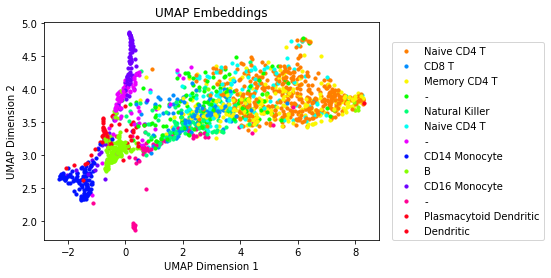

In [5]:
# Plot the embeddings in 2D
import matplotlib.pyplot as plt
import csv

cluster_file_path = '../results/' + sample_name + '_results/clustering/sensitivity_' + sensitivity + '/clusters.csv'
clusters = []  # Initialize an empty list to store cell type data
with open(cluster_file_path, 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        if row:  # Check if the row is not empty
            try:
                clusters.append(int(row[1]))
            except:
                pass

# Get the cell type from number
cell_types = {}
with open('../results/' + sample_name + '_results/clustering/sensitivity_' + sensitivity + '/cell_type_annotation/' + genome + '/cell_types/graph_clusters.csv', 'r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        cell_types[row[0]] = row[1]

# Add points to plot with colors indicating cell type
cmap = plt.cm.get_cmap('hsv', max(clusters))
labeled = []
for count, point in enumerate(embedding):
    if clusters[count] not in labeled:
        plt.scatter(point[0], point[1], c=[cmap(clusters[count])], s=10, label=cell_types[str(clusters[count])])
        labeled.append(clusters[count])
    else:
        plt.scatter(point[0], point[1], c=[cmap(clusters[count])], s=10)

plt.title('UMAP Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(loc=(1.04, 0))
plt.show()

In [6]:
import csv

# Get the cell type from number
cell_types = {}
with open('../results/' + sample_name + '_results/clustering/sensitivity_' + sensitivity + '/cell_type_annotation/' + genome + '/cell_types/graph_clusters.csv', 'r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        if row[1] != "-":
            cell_types[row[0]] = row[1]
        else:
            cell_types[row[0]] = "NO_CELL_TYPE"

# Add the cell type to the end of each barcode
annotated_barcodes = []
for i in range(len(barcodes)):
    annotated_barcodes.append(barcodes[i] + "_" + cell_types[str(clusters[i])].replace(" ", "_"))

# Write to csv file
with open('../results/' + sample_name + "_gene_matrix.csv", 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    write_barcodes = ["X"] + annotated_barcodes
    csvwriter.writerow(write_barcodes)
    for index, row in enumerate(M):
        write_gene = [genes[index]] + [str(item) for item in list(row)]
        csvwriter.writerow(write_gene)

print("Successfully created " + sample_name + "_gene_matrix.csv")

Successfully created sample2_gene_matrix.csv
